# Importing Libraries

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Importing DataSets

In [2]:
movies = pd.read_csv("C:\\Users\\Dell\\Association\\my_movies.csv")

# Removing the unwanted columns

In [3]:
movies.drop(movies.iloc[: , 0:5],  inplace = True, axis = 1)
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# Finding the frequent items

In [4]:
frequent_itemsets = apriori(movies,min_support=0.005, max_len=3,use_colnames = True)
frequent_itemsets.shape

(46, 2)

# Most Frequent item sets based on support 

In [5]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

<ipython-input-6-63a698baa67c>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,10)),height = frequent_itemsets.support[1:10],color='rgmyk');


Text(0, 0.5, 'support')

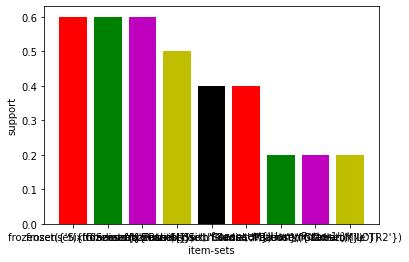

In [6]:
import matplotlib.pylab as plt
plt.bar(x = list(range(1,10)),height = frequent_itemsets.support[1:10],color='rgmyk');
plt.xticks(list(range(1,10)),frequent_itemsets.itemsets[1:10]);
plt.xlabel('item-sets');
plt.ylabel('support')

In [7]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.shape

(124, 9)

In [8]:
rules.head(20)
rules.sort_values('lift',ascending = False,inplace=True)

#  To eliminate Redudancy in Rules

In [9]:
def to_list(i):
    return (sorted(list(i)))
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)
ma_X = ma_X.apply(sorted)
rules_sets = list(ma_X)
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


# getting rules without any redudancy 

In [10]:
rules_no_redudancy  = rules.iloc[index_rules,:]

# Sorting them with respect to list and getting top 10 rules 

In [11]:
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
80,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
35,(Harry Potter1),"(Sixth Sense, LOTR1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
43,"(Sixth Sense, LOTR1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
38,"(Sixth Sense, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
12,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
70,(Green Mile),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
97,(LOTR),"(Sixth Sense, Green Mile)",0.1,0.2,0.1,1.0,5.0,0.08,inf
114,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.5,5.0,0.08,1.8
54,"(Sixth Sense, Harry Potter1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
73,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf


# Perform algorithm for different support, connfidence value and max length

In [12]:
frequent_itemsets1 = apriori(movies, min_support=0.007, max_len=4,use_colnames = True)

# Most Frequent item sets based on support 

# frequent_itemsets1.sort_values('support',ascending = False,inplace=True)
plt.bar(x = list(range(1,10)),height = frequent_itemsets1.support[1:10],color='rgmyk');
plt.xticks(list(range(1,10)),frequent_itemsets1.itemsets[1:10]);
plt.xlabel('item-sets');
plt.ylabel('support')

In [13]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1.head(20)
rules1.sort_values('lift',ascending = False,inplace=True)

In [14]:
frequent_itemsets2 = apriori(movies, min_support=0.009, max_len=5,use_colnames = True)

# Most Frequent item sets based on support 

<ipython-input-15-0025caa8a40a>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,10)),height = frequent_itemsets2.support[1:10],color='rgmyk');plt.xticks(list(range(1,10)),frequent_itemsets2.itemsets[1:10]);


Text(0, 0.5, 'support')

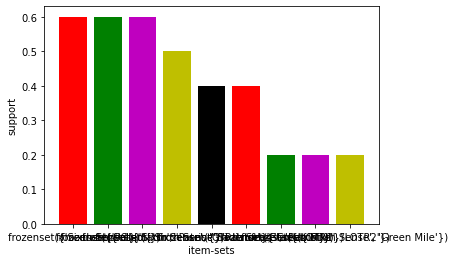

In [15]:
frequent_itemsets2.sort_values('support',ascending = False,inplace=True)
plt.bar(x = list(range(1,10)),height = frequent_itemsets2.support[1:10],color='rgmyk');plt.xticks(list(range(1,10)),frequent_itemsets2.itemsets[1:10]);
plt.xlabel('item-sets');
plt.ylabel('support')

In [16]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules2.head(20)
rules2.sort_values('lift',ascending = False,inplace=True)